In [1]:
%matplotlib inline

from cpe_help import Department, util

dept = Department('11-00091')

In [2]:
import pandas

## Demonstration

### ACS Data

A list of variables is retrieved from the Census API for each department.

For regions where there is no direct measure (e.g. police precincts), values are predicted from the block groups, using a process called [areal interpolation][1].

[1]: http://desktop.arcgis.com/en/arcmap/latest/extensions/geostatistical-analyst/what-is-areal-interpolation.htm

#### City level

In [3]:
path = dept.output_dir / 'acs' / 'city_stats.json'
ser = pandas.Series(util.io.load_json(path))
ser

TOTAL_POPULATION         658283.300907
SEX_TOTAL                658283.300907
SEX_MALE                 316010.433636
SEX_FEMALE               342272.867271
RACE_TOTAL               658283.300907
RACE_NH_WHITE            298378.000000
RACE_NH_BLACK            150041.300907
RACE_NH_INDIAN             1283.000000
RACE_NH_ASIAN             60985.000000
RACE_NH_HAWAIIAN             97.000000
RACE_NH_OTHER              6898.000000
RACE_NH_MULTIRACIAL       15514.000000
RACE_HISPANIC            125087.000000
POVERTY_TOTAL            614861.300907
POVERTY_BPL              129846.000000
POVERTY_NOT_BPL          485015.300907
EMPLOYMENT_TOTAL         384981.433636
EMPLOYMENT_EMPLOYED      354353.433636
EMPLOYMENT_UNEMPLOYED     30628.000000
dtype: float64

#### Census tract level

In [4]:
path = dept.output_dir / 'acs' / 'census_tracts.geojson'
df = util.io.load_geojson(path)
df.head()

,state,county,tract,GEOGRAPHY_NAME,TOTAL_POPULATION,SEX_TOTAL,SEX_MALE,SEX_FEMALE,RACE_TOTAL,RACE_NH_WHITE,...,RACE_NH_OTHER,RACE_NH_MULTIRACIAL,RACE_HISPANIC,POVERTY_TOTAL,POVERTY_BPL,POVERTY_NOT_BPL,EMPLOYMENT_TOTAL,EMPLOYMENT_EMPLOYED,EMPLOYMENT_UNEMPLOYED,geometry
0,25,017,350700,"Census Tract 3507, Middlesex County, Massachus...",6424,6424,3395,3029,6424,4804,...,0,223,250,6399,1246,5153,4526,4174,352,"POLYGON ((-71.134623 42.404376, -71.134623 42...."
1,25,017,350800,"Census Tract 3508, Middlesex County, Massachus...",2027,2027,935,1092,2027,1590,...,0,105,93,2027,119,1908,1562,1543,19,"POLYGON ((-71.130698 42.400943, -71.128485 42...."
2,25,017,350900,"Census Tract 3509, Middlesex County, Massachus...",3727,3727,1752,1975,3727,3224,...,0,103,73,3727,293,3434,2915,2876,39,"POLYGON ((-71.12741 42.397487, -71.125415 42.3..."
3,25,017,351000,"Census Tract 3510, Middlesex County, Massachus...",7692,7692,3728,3964,7692,6040,...,113,170,390,7692,1371,6321,5673,5399,274,"POLYGON ((-71.11815900000001 42.388025, -71.11..."
4,25,017,351100,"Census Tract 3511, Middlesex County, Massachus...",6059,6059,2969,3090,6059,4398,...,17,123,642,6008,626,5382,4453,4382,71,"POLYGON ((-71.11056600000001 42.38505, -71.110..."


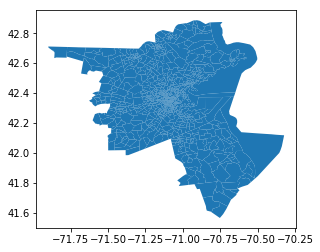

In [5]:
df.plot();

#### [Block group][1] level

[1]: https://en.wikipedia.org/wiki/Census_block_group

In [6]:
path = dept.output_dir / 'acs' / 'block_groups.geojson'
df = util.io.load_geojson(path)
df.head()

,state,county,tract,block group,GEOGRAPHY_NAME,TOTAL_POPULATION,SEX_TOTAL,SEX_MALE,SEX_FEMALE,RACE_TOTAL,...,RACE_NH_OTHER,RACE_NH_MULTIRACIAL,RACE_HISPANIC,POVERTY_TOTAL,POVERTY_BPL,POVERTY_NOT_BPL,EMPLOYMENT_TOTAL,EMPLOYMENT_EMPLOYED,EMPLOYMENT_UNEMPLOYED,geometry
0,25,021,422302,2,"Block Group 2, Census Tract 4223.02, Norfolk C...",1007,1007,389,618,1007,...,0,157,58,1007,25,982,664,609,55,"POLYGON ((-70.94656000000001 42.184707, -70.94..."
1,25,009,203100,5,"Block Group 5, Census Tract 2031, Essex County...",914,914,440,474,914,...,0,0,81,914,22,892,453,453,0,"POLYGON ((-70.886028 42.485294, -70.885802 42...."
2,25,009,217202,4,"Block Group 4, Census Tract 2172.02, Essex Cou...",1028,1028,564,464,1028,...,0,0,40,1028,48,980,551,532,19,"POLYGON ((-70.91213999999999 42.547731, -70.91..."
3,25,023,525101,3,"Block Group 3, Census Tract 5251.01, Plymouth ...",996,996,572,424,996,...,0,39,0,996,75,921,538,538,0,"POLYGON ((-71.003409 41.993932, -71.0033690000..."
4,25,023,525101,4,"Block Group 4, Census Tract 5251.01, Plymouth ...",2369,2369,1240,1129,2369,...,0,13,0,2330,172,2158,1556,1416,140,"POLYGON ((-70.988587 41.996525, -70.9885600000..."


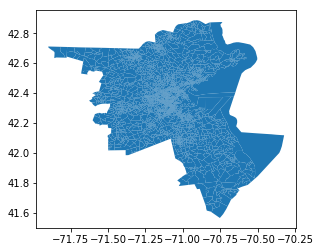

In [7]:
df.plot();

#### Police precincts level

In [8]:
path = dept.output_dir / 'acs' / 'police_precincts.geojson'
df = util.io.load_geojson(path)
df.head()

,DISTRICT_I,ID,DISTRICT,SHAPE_area,SHAPE_len,TOTAL_POPULATION,SEX_TOTAL,SEX_MALE,SEX_FEMALE,RACE_TOTAL,...,RACE_NH_OTHER,RACE_NH_MULTIRACIAL,RACE_HISPANIC,POVERTY_TOTAL,POVERTY_BPL,POVERTY_NOT_BPL,EMPLOYMENT_TOTAL,EMPLOYMENT_EMPLOYED,EMPLOYMENT_UNEMPLOYED,geometry
0,0.0,D14,D14,1.236310e+08,58042.148803,68583.239094,68583.239094,31954.560513,36628.678581,68583.239094,...,559.284171,1732.683662,7470.725990,59483.144330,14650.478357,44832.665973,41548.738828,39290.786405,2257.952423,POLYGON ((-71.11075672247946 42.35221730534519...
1,0.0,A15,A15,3.798285e+07,57557.005649,16226.937087,16226.937087,7367.324988,8859.612099,16226.937087,...,78.171013,230.671598,1810.675015,16082.490641,3218.597864,12863.892778,9961.380917,9539.959262,421.421655,(POLYGON ((-71.07415951933648 42.3905029979474...
2,0.0,A7,A7,1.401151e+08,138468.216239,42156.125730,42156.125730,22862.051906,19294.073824,42156.125730,...,106.141773,1572.260703,24867.663303,41993.869217,7674.570306,34319.298911,26162.960335,24335.605143,1827.355193,(POLYGON ((-70.99644373897635 42.3955593012363...
3,0.0,A1,A1,4.545927e+07,49109.158160,41740.089889,41740.089889,20742.676011,20997.413878,41740.089889,...,106.244260,880.788978,2522.886123,37949.966055,5947.728692,32002.237363,27796.025686,26282.768584,1513.257102,POLYGON ((-71.05199465132354 42.36882731998438...
4,0.0,D4,D4,7.004073e+07,40964.780546,87220.968961,87220.968961,42410.731066,44810.237895,87220.968961,...,368.440166,2122.094637,11828.227158,69644.046458,17784.838546,51859.207911,51918.577912,47864.901963,4053.675949,POLYGON ((-71.06182602641412 42.34393907752123...


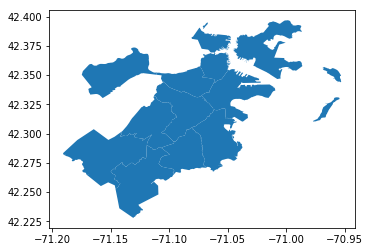

In [9]:
df.plot();

### Individual department files

Individual department files can also be processed. For example, the use of force file for the Austin Police Department had coordinate variables in a non-usual CRS (coordinate reference system). The processing step transformed those coordinates into the latitude and longitude values.

In [10]:
dept = Department('37-00027')

Original file:

In [11]:
df = dept.files['uof'].load_raw()
df.head()

,RIN,PRIMARY_KEY,INCIDENT_DATE,LOCATION_DISTRICT,INCIDENT_REASON,REASON_FOR_FORCE,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,SUBJECT_ROLE,...,Unnamed: 19,OFFICER_YEARS_ON_FORCE,Y_COORDINATE,Y_COORDINATE.1,LOCATION_DISTRICT.1,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_CITY,LOCATION_STATE,LOCATION_LATITUDE,LOCATION_LONGITUDE
0,156701,2015541517,2/24/2015,FR,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,167510327: 2015541517,M,Hispanic,NaN,...,CRIMINAL INTERDICTION / K9,3,3100341,10030899,5.0,9900 BLOCK S IH 35 SB,Austin,TX,NaN,NaN
1,161046,20151510003,5/31/2015,GE,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,459191174: 20151510003,M,Hispanic,NaN,...,GEORGE 300 REG I PATROL,5,3115535,10070296,9.0,409 E 6TH ST,Austin,TX,NaN,NaN
2,161381,20151510003,5/31/2015,GE,VIEWED OFFENSE,"IN CUSTODY, MAINTAINING CONTROL",459191174: 20151510003,M,Hispanic,NaN,...,GEORGE 300 REG I PATROL,7,3115535,10070296,9.0,409 E 6TH ST,Austin,TX,NaN,NaN
3,142588,2014111929,1/11/2014,HE,TRAFFIC STOP,NECESSARY TO DEFEND REPORTING OFFICER,198377769: 2014111929,M,Black,SUSPECT,...,HENRY 700 REG III PATROL,4,3117503,10057313,NaN,BURTON DR / E OLTORF ST,Austin,TX,NaN,NaN
4,162084,20151720001,6/21/2015,GE,DISPATCHED CALL,TO RESTRAIN FOR SUBJECTS SAFETY,459030448: 20151720001,M,Black,NaN,...,GEORGE 400 REG I PATROL,3,3116713,10067447,3.0,SAN MARCOS ST / SPENCE ST,Austin,TX,NaN,NaN


Processed file:

**TODO: Keep Latitude/Longitude format the same**

In [12]:
df = dept.files['uof'].load_processed()
df.head()

,RIN,PRIMARY_KEY,INCIDENT_DATE,LOCATION_DISTRICT,INCIDENT_REASON,REASON_FOR_FORCE,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,SUBJECT_DESCRIPTION,...,LOCATION_STATE,LOCATION_GEOCODED,NUMBER_EC_CYCLES,SUBJECT_ROLE,LOCATION_LATITUDE,LOCATION_LONGITUDE,TYPE_OF_FORCE_USED2,TYPE_OF_FORCE_USED3,TYPE_OF_FORCE_USED4,geometry
0,156701,2015541517,2015-02-24T00:00:00,FR,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,167510327: 2015541517,M,Hispanic,SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS,...,TX,1,NaN,None,NaN,NaN,None,None,None,POINT (-97.78993508477365 30.15939914213043)
1,161046,2147483647,2015-05-31T00:00:00,GE,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,459191174: 20151510003,M,Hispanic,SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS,...,TX,1,NaN,None,NaN,NaN,None,None,None,POINT (-97.73896571602758 30.26673094752446)
2,161381,2147483647,2015-05-31T00:00:00,GE,VIEWED OFFENSE,"IN CUSTODY, MAINTAINING CONTROL",459191174: 20151510003,M,Hispanic,SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS,...,TX,1,1.0,None,NaN,NaN,None,None,None,POINT (-97.73896571602758 30.26673094752446)
3,142588,2014111929,2014-01-11T00:00:00,HE,TRAFFIC STOP,NECESSARY TO DEFEND REPORTING OFFICER,198377769: 2014111929,M,Black,EDP/MENTALLY UNSTABLE; SUSPECTED UNDER INFLUEN...,...,TX,1,NaN,SUSPECT,NaN,NaN,None,None,None,POINT (-97.73369451571814 30.23091640447373)
4,162084,2147483647,2015-06-21T00:00:00,GE,DISPATCHED CALL,TO RESTRAIN FOR SUBJECTS SAFETY,459030448: 20151720001,M,Black,SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS,...,TX,1,NaN,None,NaN,NaN,None,None,None,POINT (-97.73544600762763 30.25882389999299)


### Python package

The answer in itself is a python package. So, if you are using python, you can access department methods directly.

In [13]:
from cpe_help import Department

dept = Department.sample()
dept

Department('11-00091')

In [14]:
dept.full_name

'11-00091 (Boston, MA)'

In [15]:
df = dept.load_police_precincts()
df.head()

,DISTRICT_I,ID,DISTRICT,SHAPE_area,SHAPE_len,TOTAL_POPULATION,SEX_TOTAL,SEX_MALE,SEX_FEMALE,RACE_TOTAL,...,RACE_NH_OTHER,RACE_NH_MULTIRACIAL,RACE_HISPANIC,POVERTY_TOTAL,POVERTY_BPL,POVERTY_NOT_BPL,EMPLOYMENT_TOTAL,EMPLOYMENT_EMPLOYED,EMPLOYMENT_UNEMPLOYED,geometry
0,0.0,D14,D14,1.236310e+08,58042.148803,68583.239094,68583.239094,31954.560513,36628.678581,68583.239094,...,559.284171,1732.683662,7470.725990,59483.144330,14650.478357,44832.665973,41548.738828,39290.786405,2257.952423,POLYGON ((-71.11075672247946 42.35221730534519...
1,0.0,A15,A15,3.798285e+07,57557.005649,16226.937087,16226.937087,7367.324988,8859.612099,16226.937087,...,78.171013,230.671598,1810.675015,16082.490641,3218.597864,12863.892778,9961.380917,9539.959262,421.421655,(POLYGON ((-71.07415951933648 42.3905029979474...
2,0.0,A7,A7,1.401151e+08,138468.216239,42156.125730,42156.125730,22862.051906,19294.073824,42156.125730,...,106.141773,1572.260703,24867.663303,41993.869217,7674.570306,34319.298911,26162.960335,24335.605143,1827.355193,(POLYGON ((-70.99644373897635 42.3955593012363...
3,0.0,A1,A1,4.545927e+07,49109.158160,41740.089889,41740.089889,20742.676011,20997.413878,41740.089889,...,106.244260,880.788978,2522.886123,37949.966055,5947.728692,32002.237363,27796.025686,26282.768584,1513.257102,POLYGON ((-71.05199465132354 42.36882731998438...
4,0.0,D4,D4,7.004073e+07,40964.780546,87220.968961,87220.968961,42410.731066,44810.237895,87220.968961,...,368.440166,2122.094637,11828.227158,69644.046458,17784.838546,51859.207911,51918.577912,47864.901963,4053.675949,POLYGON ((-71.06182602641412 42.34393907752123...


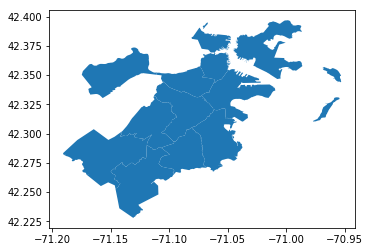

In [16]:
df.plot();

### Output directory

If you want to retrieve the outputs manually, they are stored in a specific folder for each department.

For example:

In [17]:
!tree {dept.output_dir}

/amnt/code/cpe/data/output/department/11-00091
├── acs
│   ├── block_groups.geojson
│   ├── census_tracts.geojson
│   ├── city_stats.json
│   └── police_precincts.geojson
├── other
├── _sanity_check
│   ├── figures
│   │   ├── figure1.png
│   │   ├── figure2.png
│   │   ├── figure3.png
│   │   ├── figure4.png
│   │   └── figure5.png
│   └── report.md
└── sanity_check.html

4 directories, 11 files
